# Hierarchical modeling

From [Issue #271](https://github.com/cgre-aachen/gempy/issues/271) a description by flohorovicic:  
"We often have several regions in a model domain with different geological elements. In this case, a global interpolation will very likely cause problems.

Simple example: faults, different models on both sides (although this is an aspect that can be handled with gempy - serves here as purpose of example). A typical procedure would be to:

1. Define a model to separate the entire modeling domain into different regions
2. Interpolate a model in each of these regions separately (note: the model will be defined in the entire domain, but only "active" in a specific region)
3. Combine a final model using the high-hierarchy "domain map" and the corresponding low-hierarchy submodels." 

<img src="https://user-images.githubusercontent.com/1070677/75426800-aa1f1280-5945-11ea-9062-d33a7be2da21.png" width=800>

In [1]:
# import libraries
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

## "High hierarchy model"

In [4]:
# Import data
# Create a model instance
glob_model = gp.create_model('global_model')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(glob_model, [0, 100., 0, 3., 0, 100.], [100, 3, 100],
            path_i = 'hierarchical_model_interfaces_fault.csv',
            path_o = 'hierarchical_model_orientations_fault.csv');

# set interpolator
gp.set_interpolator(glob_model, theano_optimizer='fast_compile', verbose=[])

# Compute the model
sol_glob = gp.compute_model(glob_model)

Active grids: ['regular']
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


../../gempy/core/solution.py:266: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


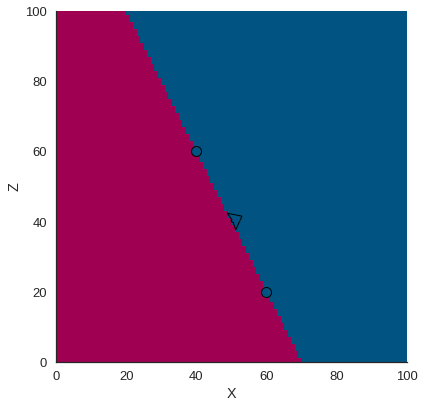

In [5]:
gp.plot.plot_section(glob_model, cell_number=1)

## Low-hierarchy model (left)

In [6]:
# Import data
# Create a model instance
left_model = gp.create_model('left_model')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(left_model, [0, 100., 0, 3., 0, 100.], [100, 3, 100],
            path_i = 'hierarchical_model_interfaces_left.csv',
            path_o = 'hierarchical_model_orientations_left.csv')

# set interpolator
gp.set_interpolator(left_model, theano_optimizer='fast_compile', verbose=[])

# Compute the model
sol_left = gp.compute_model(left_model);

Active grids: ['regular']
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


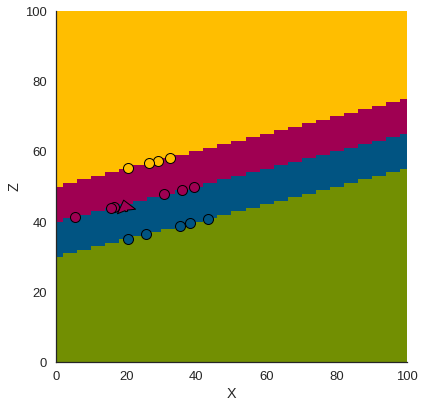

In [7]:
gp.plot.plot_section(left_model, cell_number=1);

## Low-hierarchy model (right)

In [8]:
# Import data
# Create a model instance
right_model = gp.create_model('right_model')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(right_model, [0, 100., 0, 3., 0, 100.], [100, 3, 100],
            path_i = 'hierarchical_model_interfaces_right.csv',
            path_o = 'hierarchical_model_orientations_right.csv')

# set interpolator
gp.set_interpolator(right_model, theano_optimizer='fast_compile', verbose=[])

# Compute the model
sol_glob = gp.compute_model(right_model);

Active grids: ['regular']
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


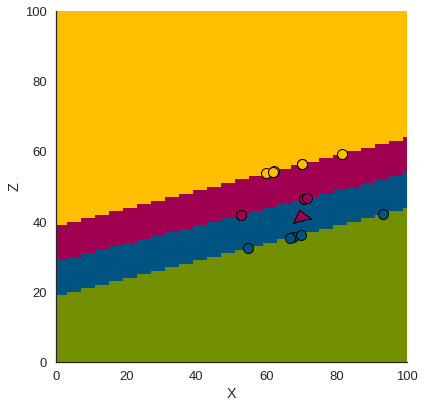

In [9]:
gp.plot.plot_section(right_model, cell_number=1)

## Combined model

The high-hierarchy model divides the model space in two parts essentially. Each of the low-hierarchy models is then modeled in the respective regions. Combining the domains then yields the total model which looks similar to the one in the right figure at the top of this notebook. 
For showing how the final, combined model would look like, we model the high-hierarchy model in gempy as a fault.  
*Note:* this is not the same as hierarchical modeling, but the result should look the same.

In [12]:
# Import data
# Create a model instance
comb_model = gp.create_model('combined_model')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(comb_model, [0, 100., 0, 3., 0, 100.], [100, 3, 100],
            path_i = 'hierarchical_model_interfaces.csv',
            path_o = 'hierarchical_model_orientations.csv')

# set interpolator
gp.set_interpolator(comb_model, theano_optimizer='fast_compile', verbose=[])

Active grids: ['regular']
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [17]:
# assign surfaces to series
gp.map_series_to_surfaces(comb_model,
                         {"Fault_series": 'fault',
                         "Lith_series": ('l3_left', 'l2_left', 'l1_left')},
                         remove_unused_series=True)
comb_model.set_is_fault('Fault_series', change_color=False)

,isFault,isFinite
Fault_series,True,False
Lith_series,False,False
Basement,False,False


In [18]:
# Compute the model
sol_comb = gp.compute_model(comb_model)

../../gempy/core/solution.py:266: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


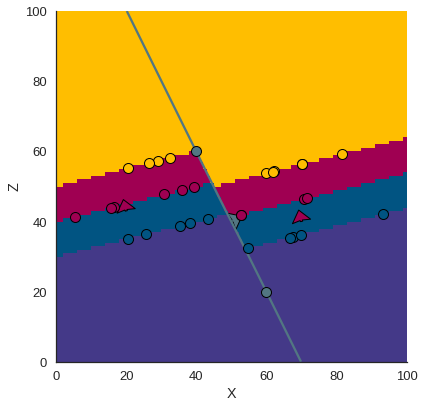

In [19]:
gp.plot.plot_section(comb_model, cell_number=1)